In [4]:
%run ../../../common_functions/import_all.py

from common_functions.setup_notebook import set_css_style, setup_matplotlib, config_ipython

import cv2

config_ipython()
setup_matplotlib()
set_css_style()

# Blurring, inverting, thresholding an image

## The original image

This is the original image we'll use here to demonstrate these manipulations. It's basically a photo I've taken of two pens on a red shiny desk, and the interesting thing is that shadow in the corner, due precisely to the surface being reflective.

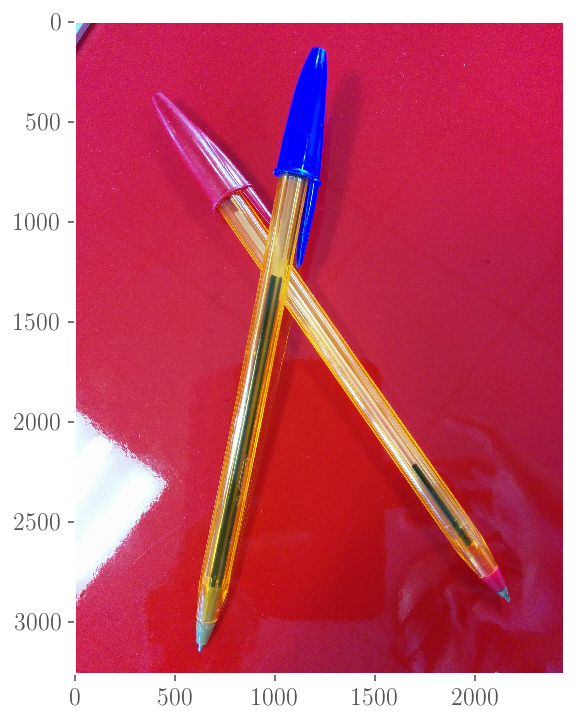

In [6]:
# read an image with OpenCV

image = cv2.imread('../../pens.jpg')

# transform into RGB as OpenCV reads in BGR (and Matplotlib uses RGB)
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show it
plt.imshow(RGB_image)
plt.grid()
plt.show();

## Blurring the image

### Normalised Box Filter

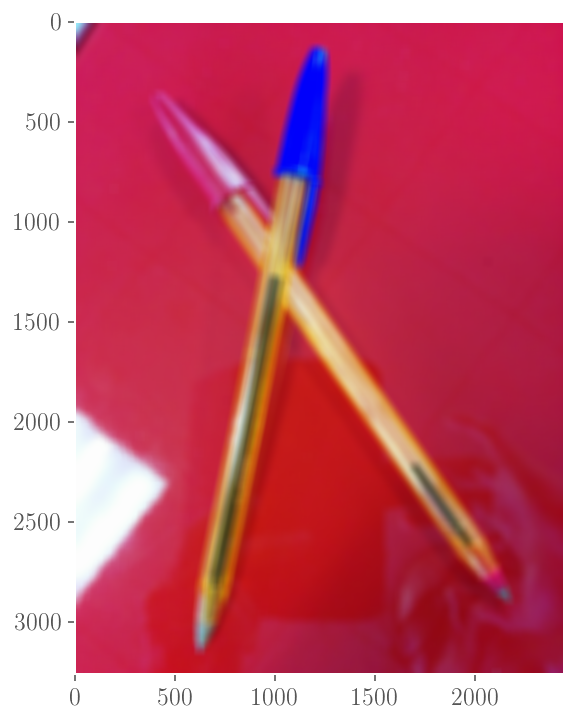

In [7]:
# a normalised box filter with kernel 50X50 and showing result
nb = cv2.blur(RGB_image, (50, 50))

plt.imshow(nb)
plt.grid()
plt.savefig('normalised-box-filter.png', dpi=200)
plt.show();

### Gaussian Filter

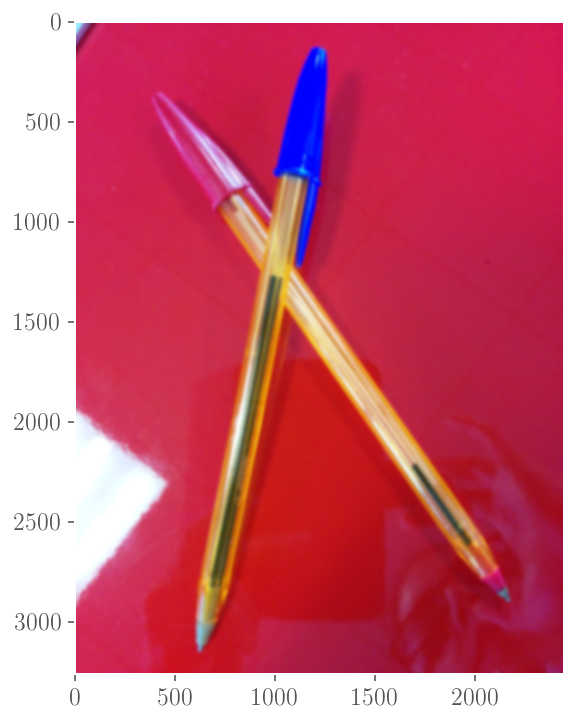

In [8]:
# a Gaussian filter with kernel 49X49 and  and showing result
# Note that the third (required) arg is the sigma_x, if 0 means both sigma_x and sigma_y are calculated from the
# kernel size. Also note kernel size must be odd (not sure why this constraint)
gb = cv2.GaussianBlur(RGB_image, (49, 49), 0)

plt.imshow(gb)
plt.grid()
plt.show();

### Median Filter

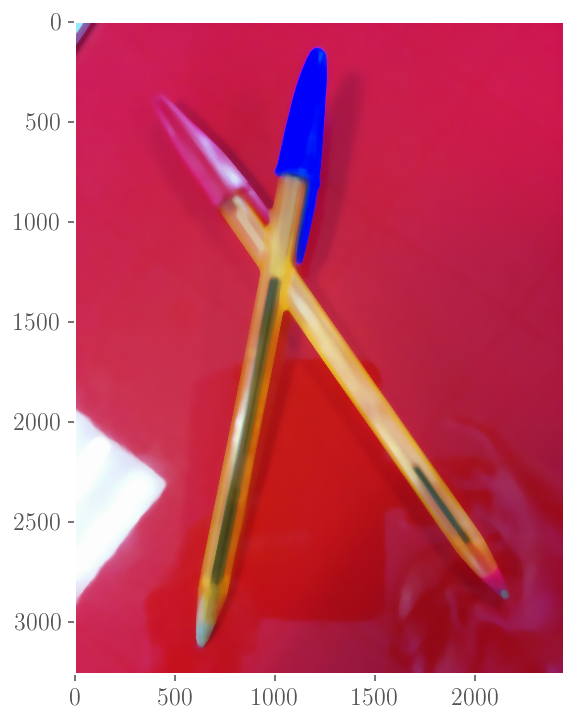

In [9]:
# a median filter with kernel 49X49 and  and showing result
# Note kernel size must be odd as for the gaussian (?)
mb = cv2.medianBlur(RGB_image, 49)

plt.imshow(mb)
plt.grid()
plt.show();

### Bilateral Filter

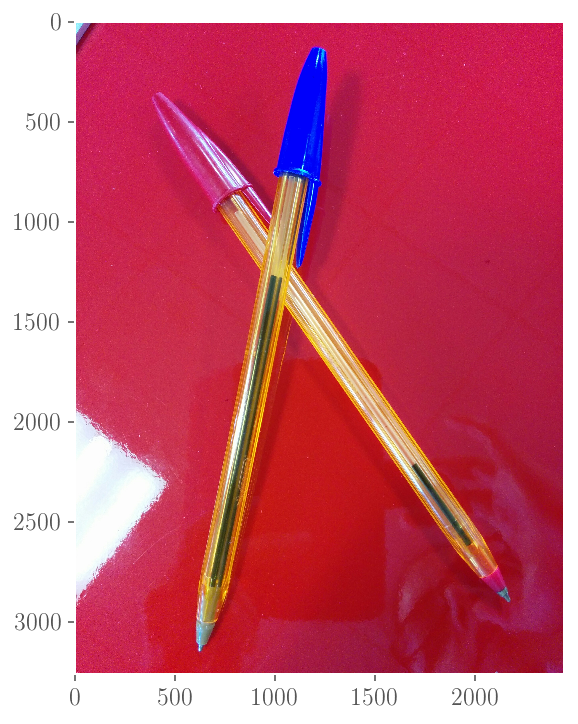

In [10]:
# a bilateral filter with kernel of diameter 15 and sigmas in color space and coordinate space
bb = cv2.bilateralFilter(RGB_image, 15, 2, 2)

plt.imshow(bb)
plt.grid()
plt.savefig('bilateral-filter.png', dpi=200)
plt.show();

## Inverting

<Figure size 720x432 with 0 Axes>

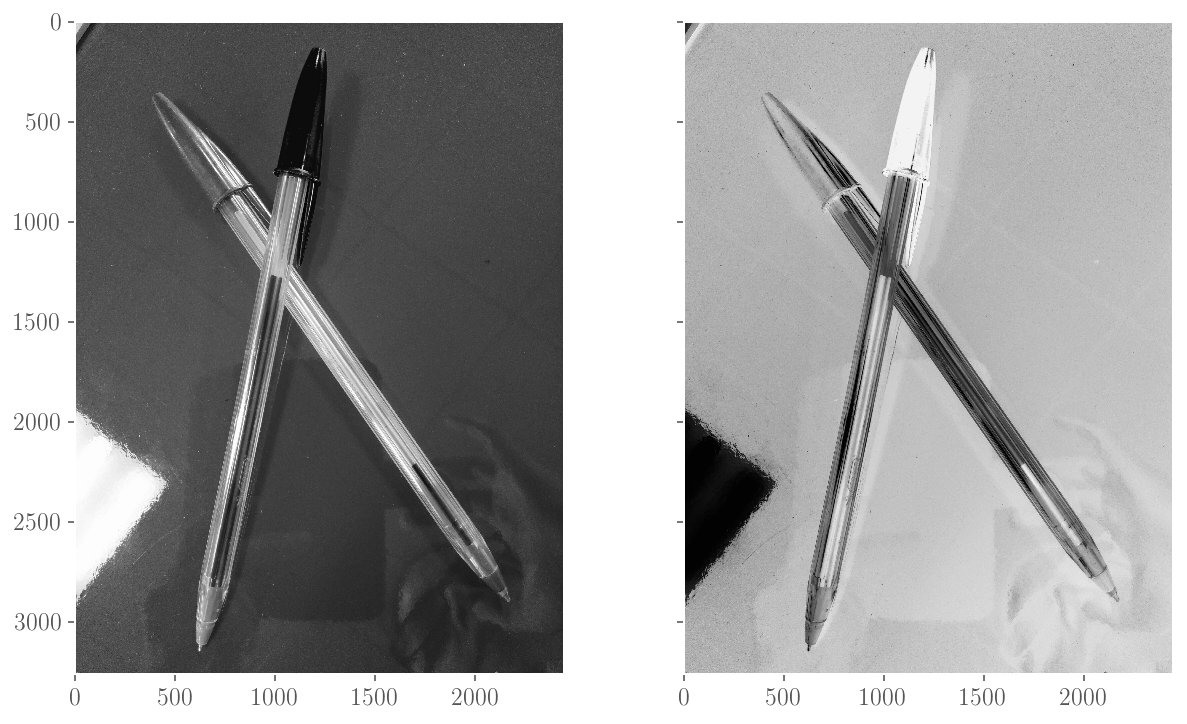

In [11]:
# make the sample image grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# invert it
inverted = 255 - gray

# Plot both gray image and inverted

plt.gray()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.grid()
ax1.imshow(gray)

ax2.grid()
ax2.imshow(inverted)

plt.show();

## Thresholding

### Simple thresholding

#### binary

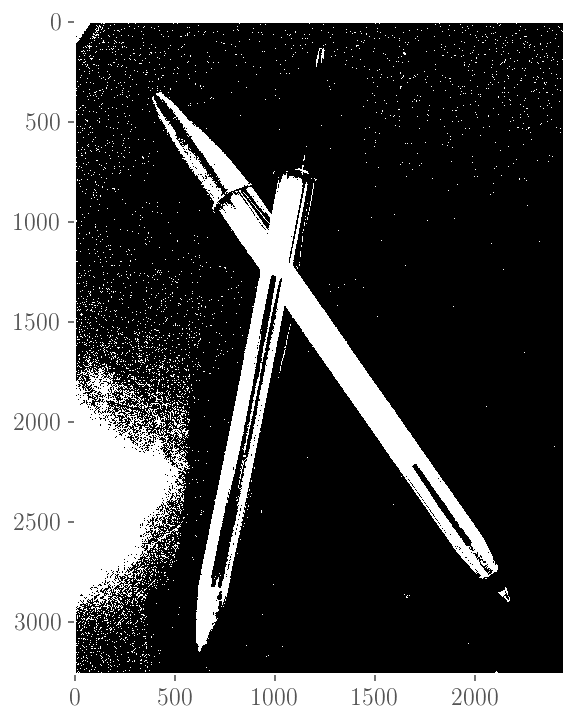

In [12]:
# binary threshold: put 255 (white) if pixel passes 100 threshold, 0 (black) otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

#### binary inverted

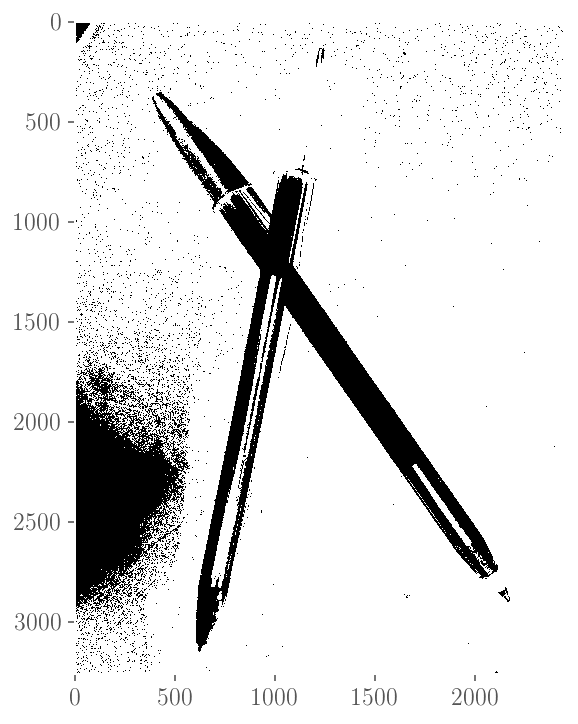

In [13]:
# binary inverted threshold: put 0 (black) if pixel passes 100 threshold, 255 (white) otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)[1]

plt.gray()
plt.grid()
plt.imshow(dest)
plt.savefig('binary-inverted.png', dpi=200)
plt.show();

#### binary truncated

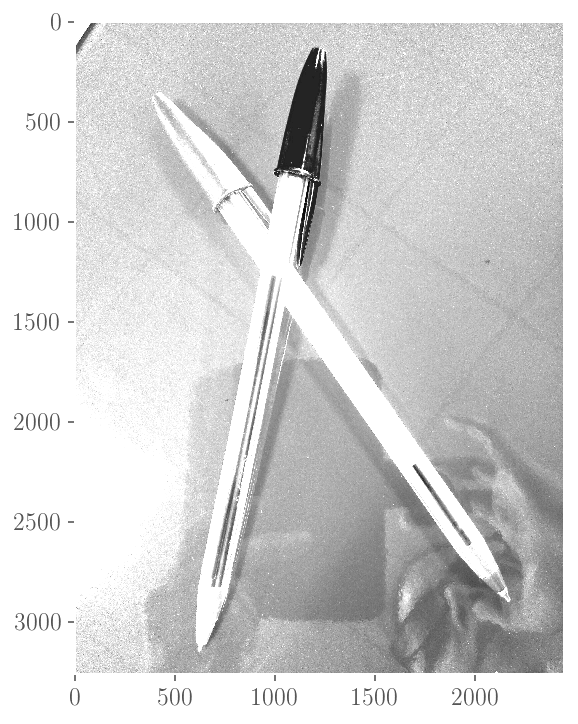

In [14]:
# binary truncated: put threshold value if pixel passes 100 threshold, keep pixel value otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_TRUNC)[1]   # note 255 here is useless but needed by method

plt.gray()
plt.grid()
plt.imshow(dest)
plt.savefig('binary-trunc.png', dpi=200)
plt.show();

#### thresholding to 0

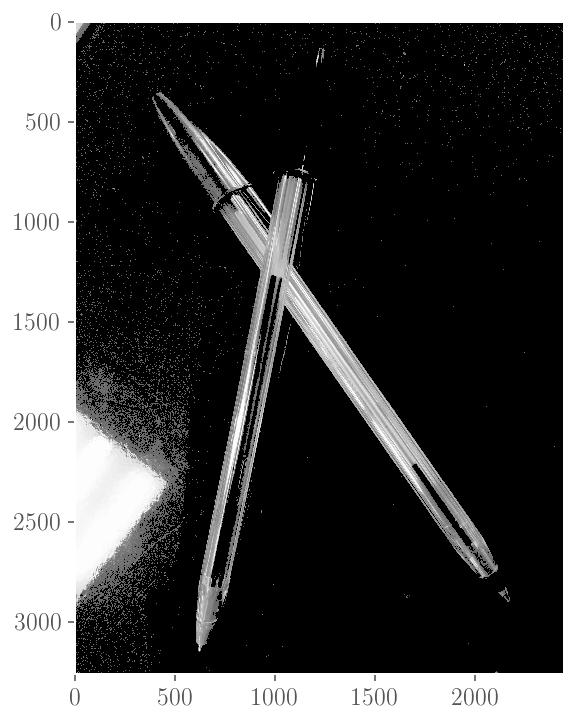

In [15]:
# to zero: put pixel value if pixel passes 100 threshold, 0 otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_TOZERO)[1]   # note 255 here is useless but needed by method

plt.gray()
plt.grid()
plt.imshow(dest)

plt.savefig('to0.png', dpi=200)
plt.show();

#### Thresholding to 0 inverted

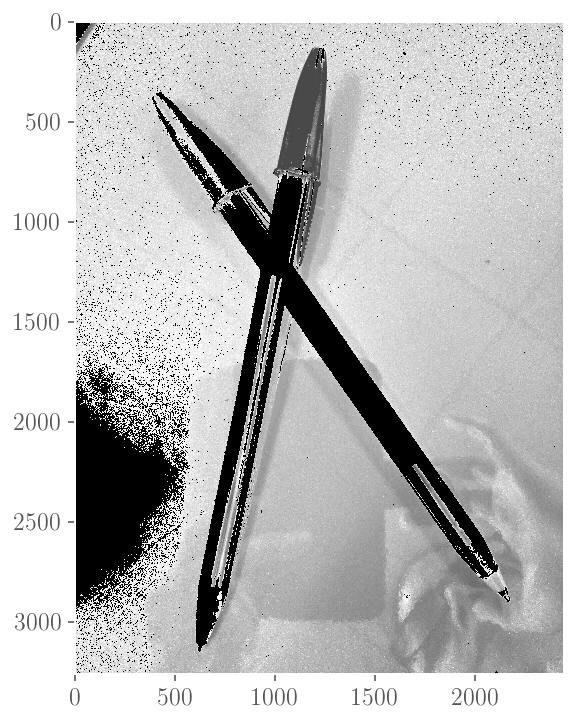

In [16]:
# to zero inverted: put 0 if pixel passes threshold, keep pixel value otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_TOZERO_INV)[1]   # note 255 here is useless but needed by method

plt.gray()
plt.grid()
plt.imshow(dest)
plt.savefig('to0inverted.png', dpi=200)
plt.show();

### Adaptive Thresholding

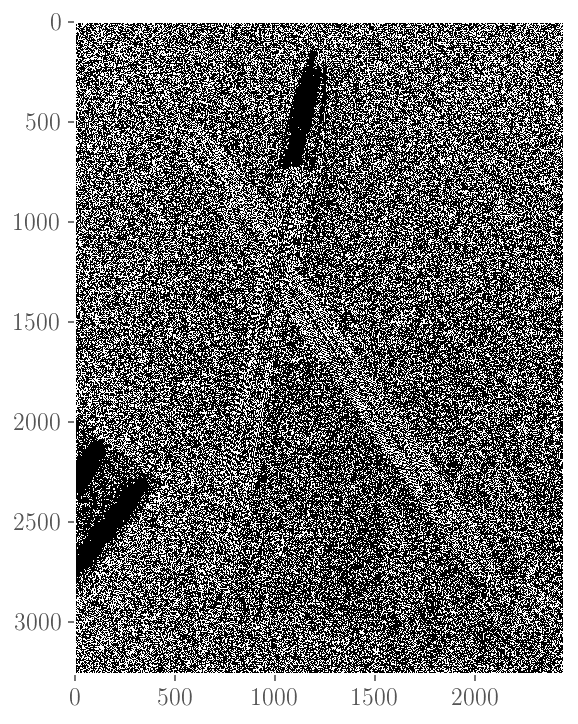

In [17]:
# adaptive mean thresholding with binary method and a neighborhood of 3X3
# note that last arg (required) gets subtracted from the mean for computing the threshold

dest = cv2.adaptiveThreshold(gray, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

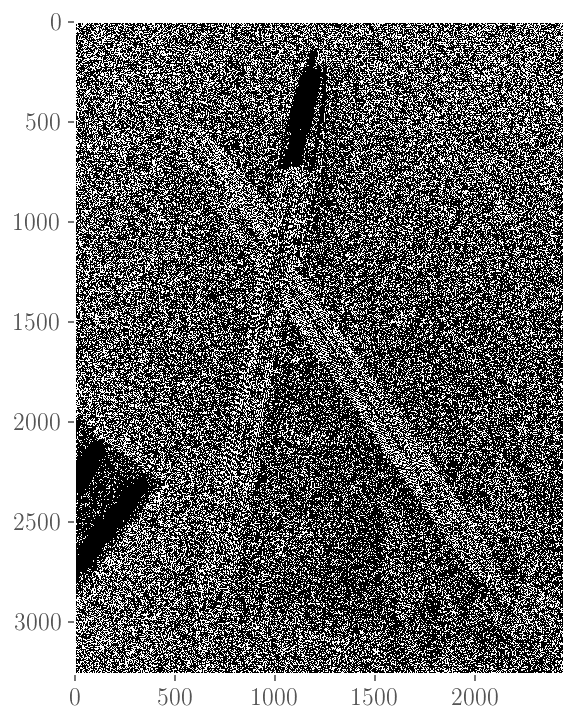

In [18]:
# adaptive gaussian thresholding with binary method and a neighborhood of 3X3
# note that last arg (required) gets subtracted from the mean for computing the threshold

dest = cv2.adaptiveThreshold(gray, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 0)

plt.gray()
plt.grid()
plt.imshow(dest)
plt.savefig('adaptive-gaussian.png', dpi=200)
plt.show();

### Otsu's Binarization Thresholding

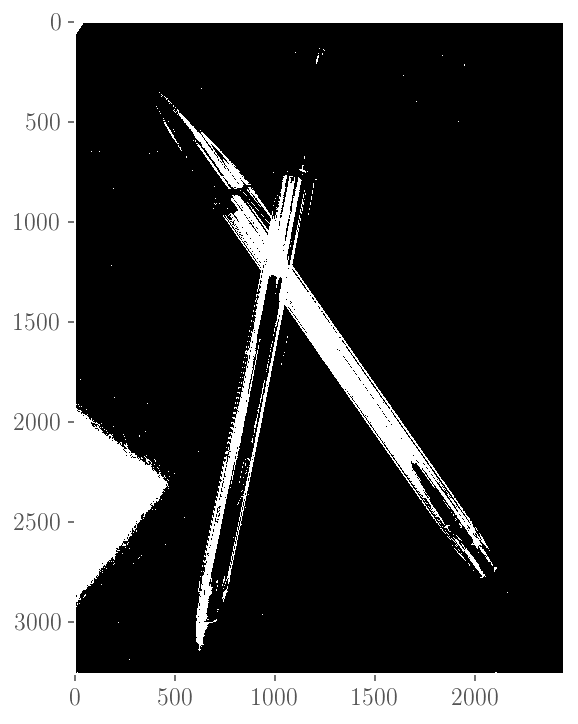

In [19]:
# Otsu binarisation

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU)[1]

plt.gray()
plt.grid()
plt.imshow(dest)
plt.savefig('otzu.png', dpi=200)
plt.show();